___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,7)
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
#Here I am seeing the shape of my data
df.shape
#As we can see there are 200 rows and 5 columns

(200, 5)

In [4]:
#To see the columns of the data
df.columns
#There are not a lot of columns only 5

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
#Here, i am seeing the info of the data
df.info()
#As we can see there are about 200 entries from 0 to 199
#There are 5 columns
#In all the 5 columns, there is no null data, which is a good thing
#There are 4 of them are int, and one of them is object which is the gender of course.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#To look more on the data
df.describe()
#From here we can say that, it seems that there is no outliers

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [7]:
#Let's see now, if there is any duplicated values on our data
df.duplicated().sum().any()
#As we can see, there is no duplicated data, which is a good thing

False

In [8]:
#Let's check if there is any null values
df.isnull().sum().any()
#As we can see, there is no null data. Pretty good.

False

### Now let's check our data more

In [9]:
#Let's start with the first column, which is CustomerID. 
df['CustomerID']
#We can say that from its name, it is a useless one, and will not benefits us

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: CustomerID, Length: 200, dtype: int64

In [10]:
df['CustomerID'].nunique()
#It has 200 values

200

In [11]:
#The shape of our data before dropping CustomerID from our data, which is (200, 5)
df.shape

(200, 5)

In [12]:
#Now, let's drop CustomerID. It is a column.
df.drop(["CustomerID"], axis = 1, inplace=True)

In [13]:
#The shape of our data after dropping CustomerID from our data, which is (200, 4)
df.shape

(200, 4)

In [14]:
#Now, let's take a look at the second column, which is Gender
df['Gender']
#As we can see, it is an object and its value is Male and Female

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [15]:
df['Gender'].value_counts()
#As we can see, the female has 112 and the male has 88 values

Gender
Female    112
Male       88
Name: count, dtype: int64

In [17]:
#Now, to be able to use with our data, I have to map it. 
#The male will be 0 and the female will be 1
mapping = {'Male': 0, 'Female': 1}

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64


In [18]:
#Now, let's see them after mapping
df['Gender']
#They are 0 and 1 now

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

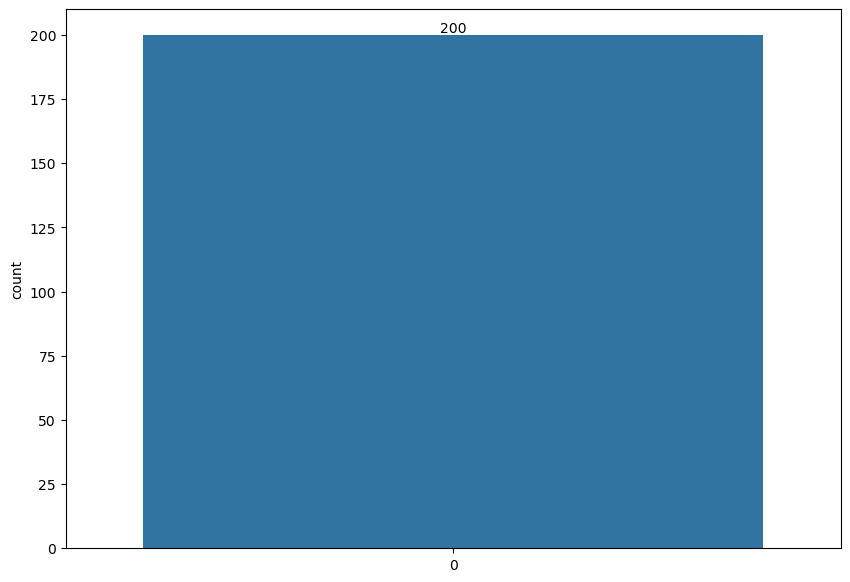

In [19]:
#Now, let's visualize the data of Gender
gen = sns.countplot(df['Gender'])
gen.bar_label(gen.containers[0]);

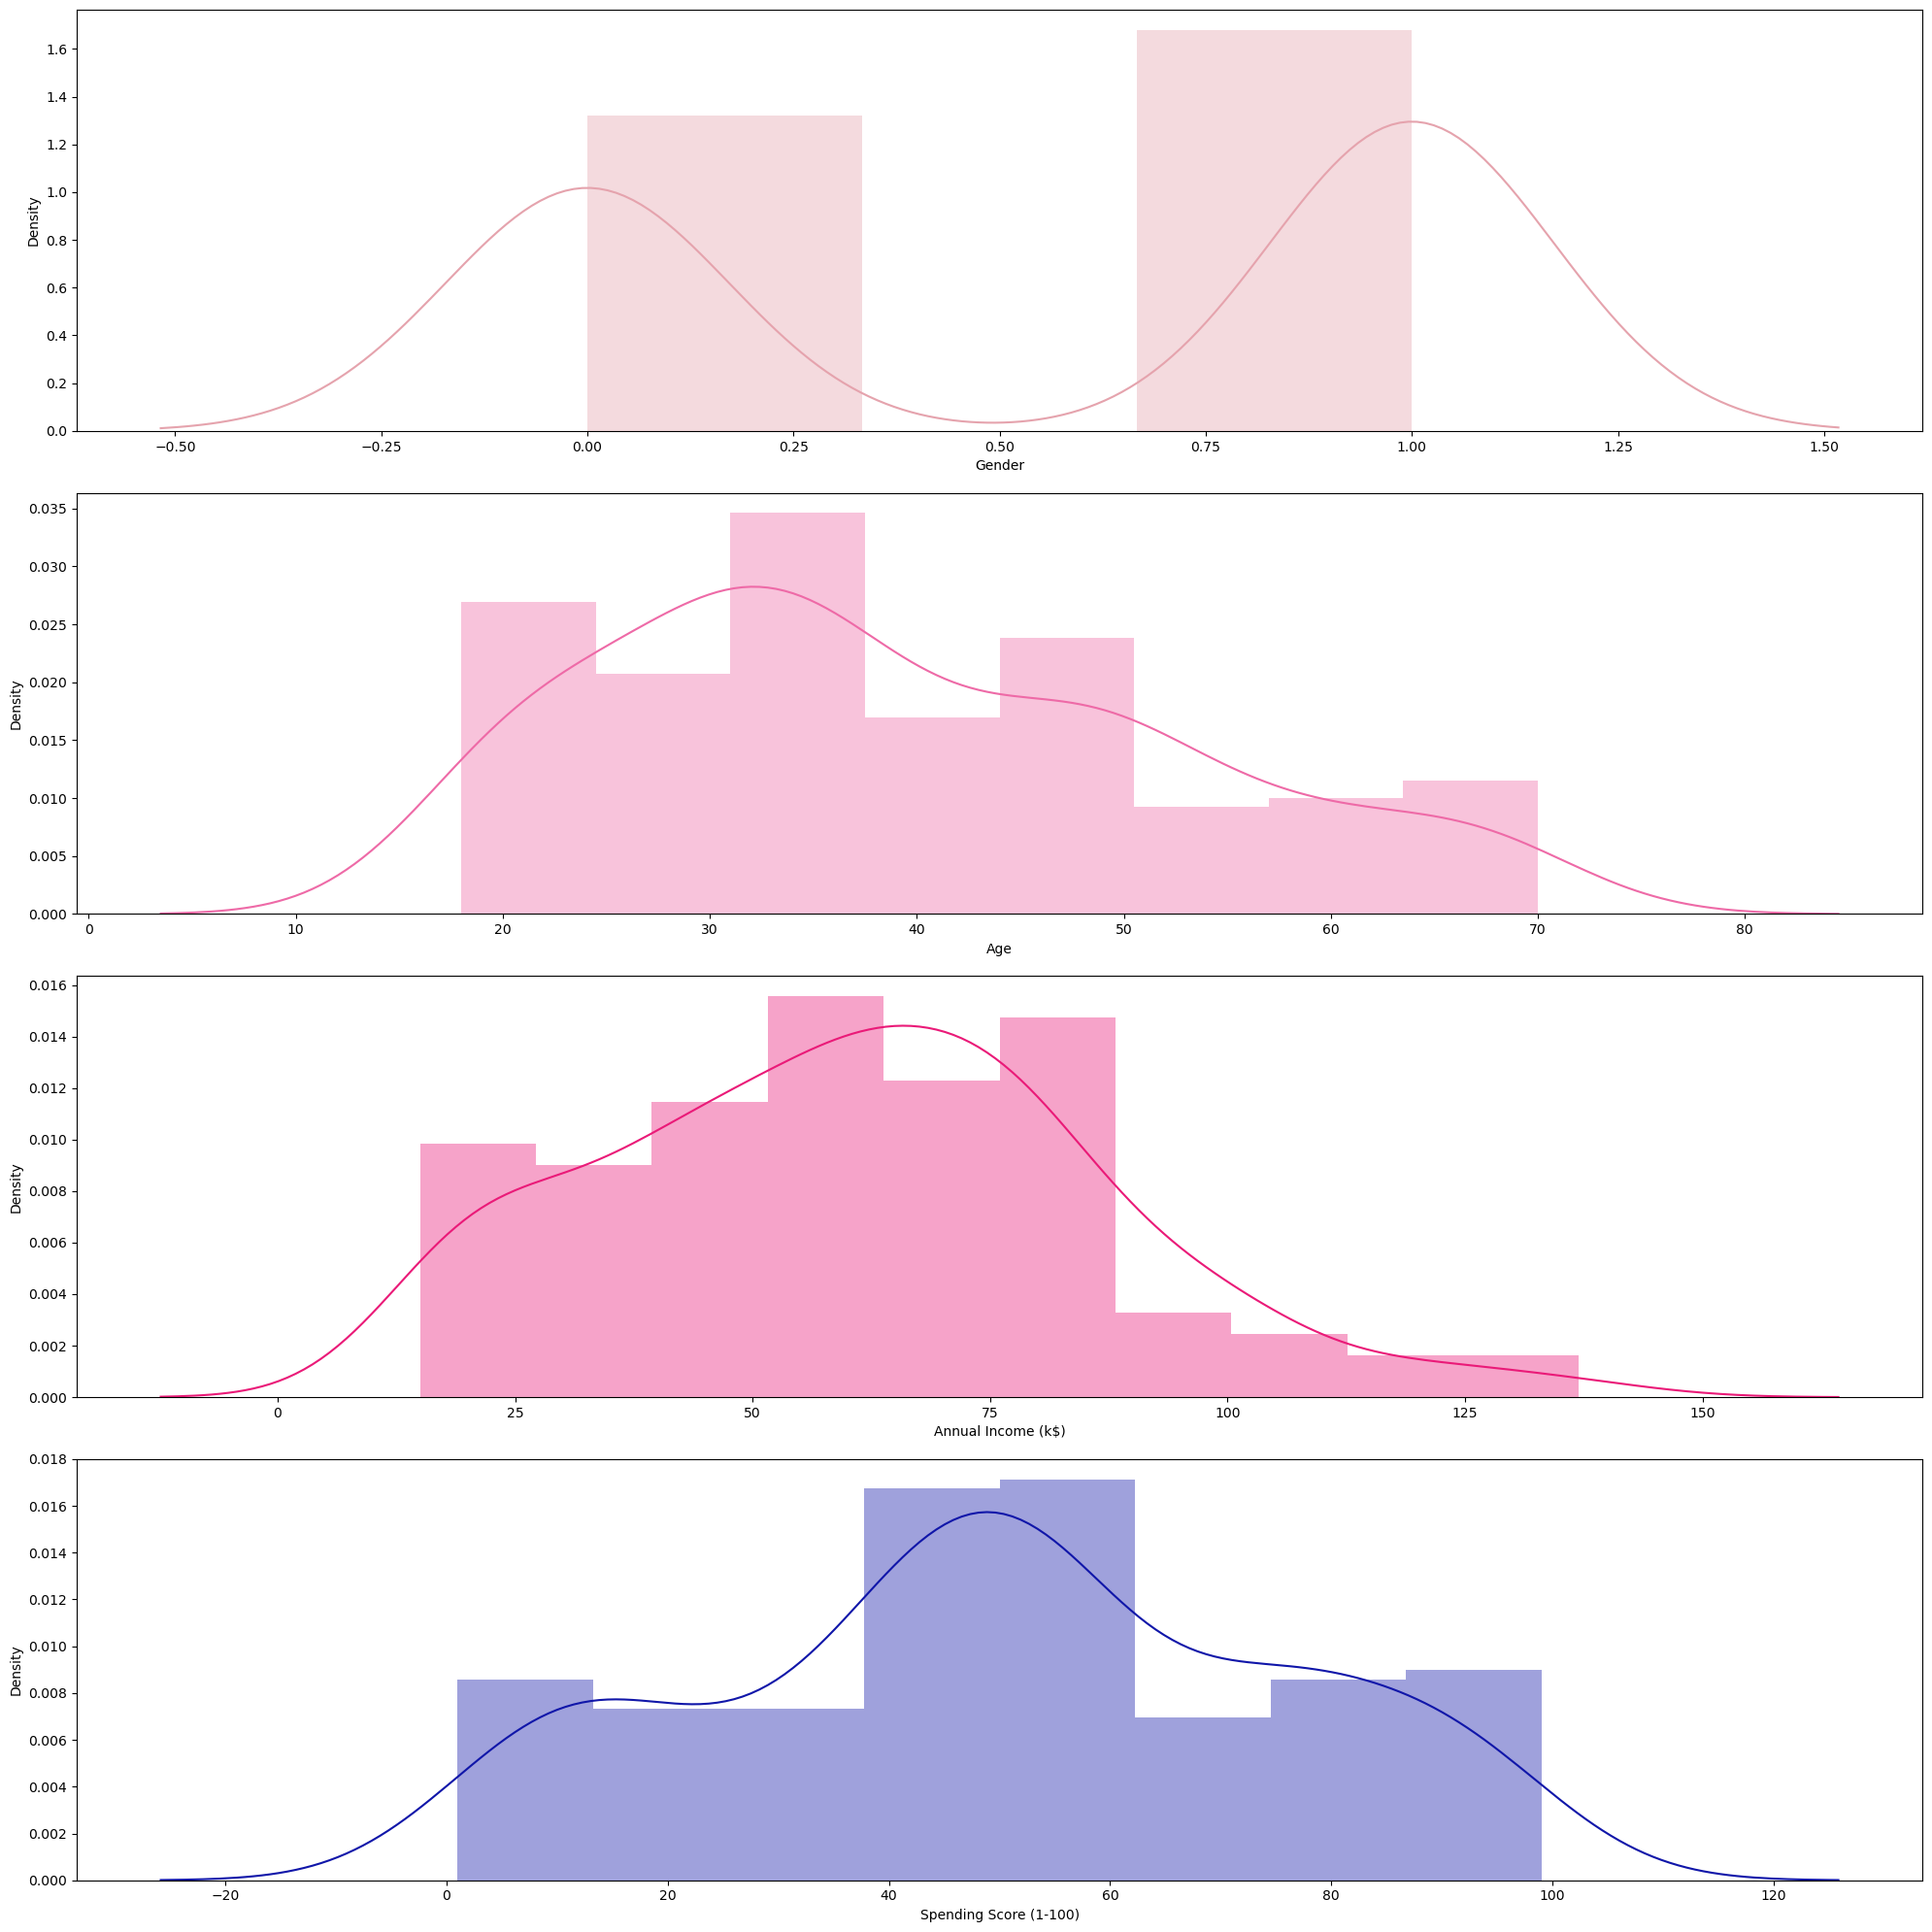

In [48]:
#Here, I am plotting the four columns
color = ["#e5a3ad", "#ee6aa7", "#ea1a78", "#1016a9"]
plt.figure(figsize = (20, 20))
column=['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in range(0,4):
    plt.subplot(4, 1, i+1)
    sns.distplot(df[column[i]], color= color[i])   
    plt.tight_layout()
    
    
#we can see from the graphs that the femals are more than the men.
#The annual income starts to decrease from about 85

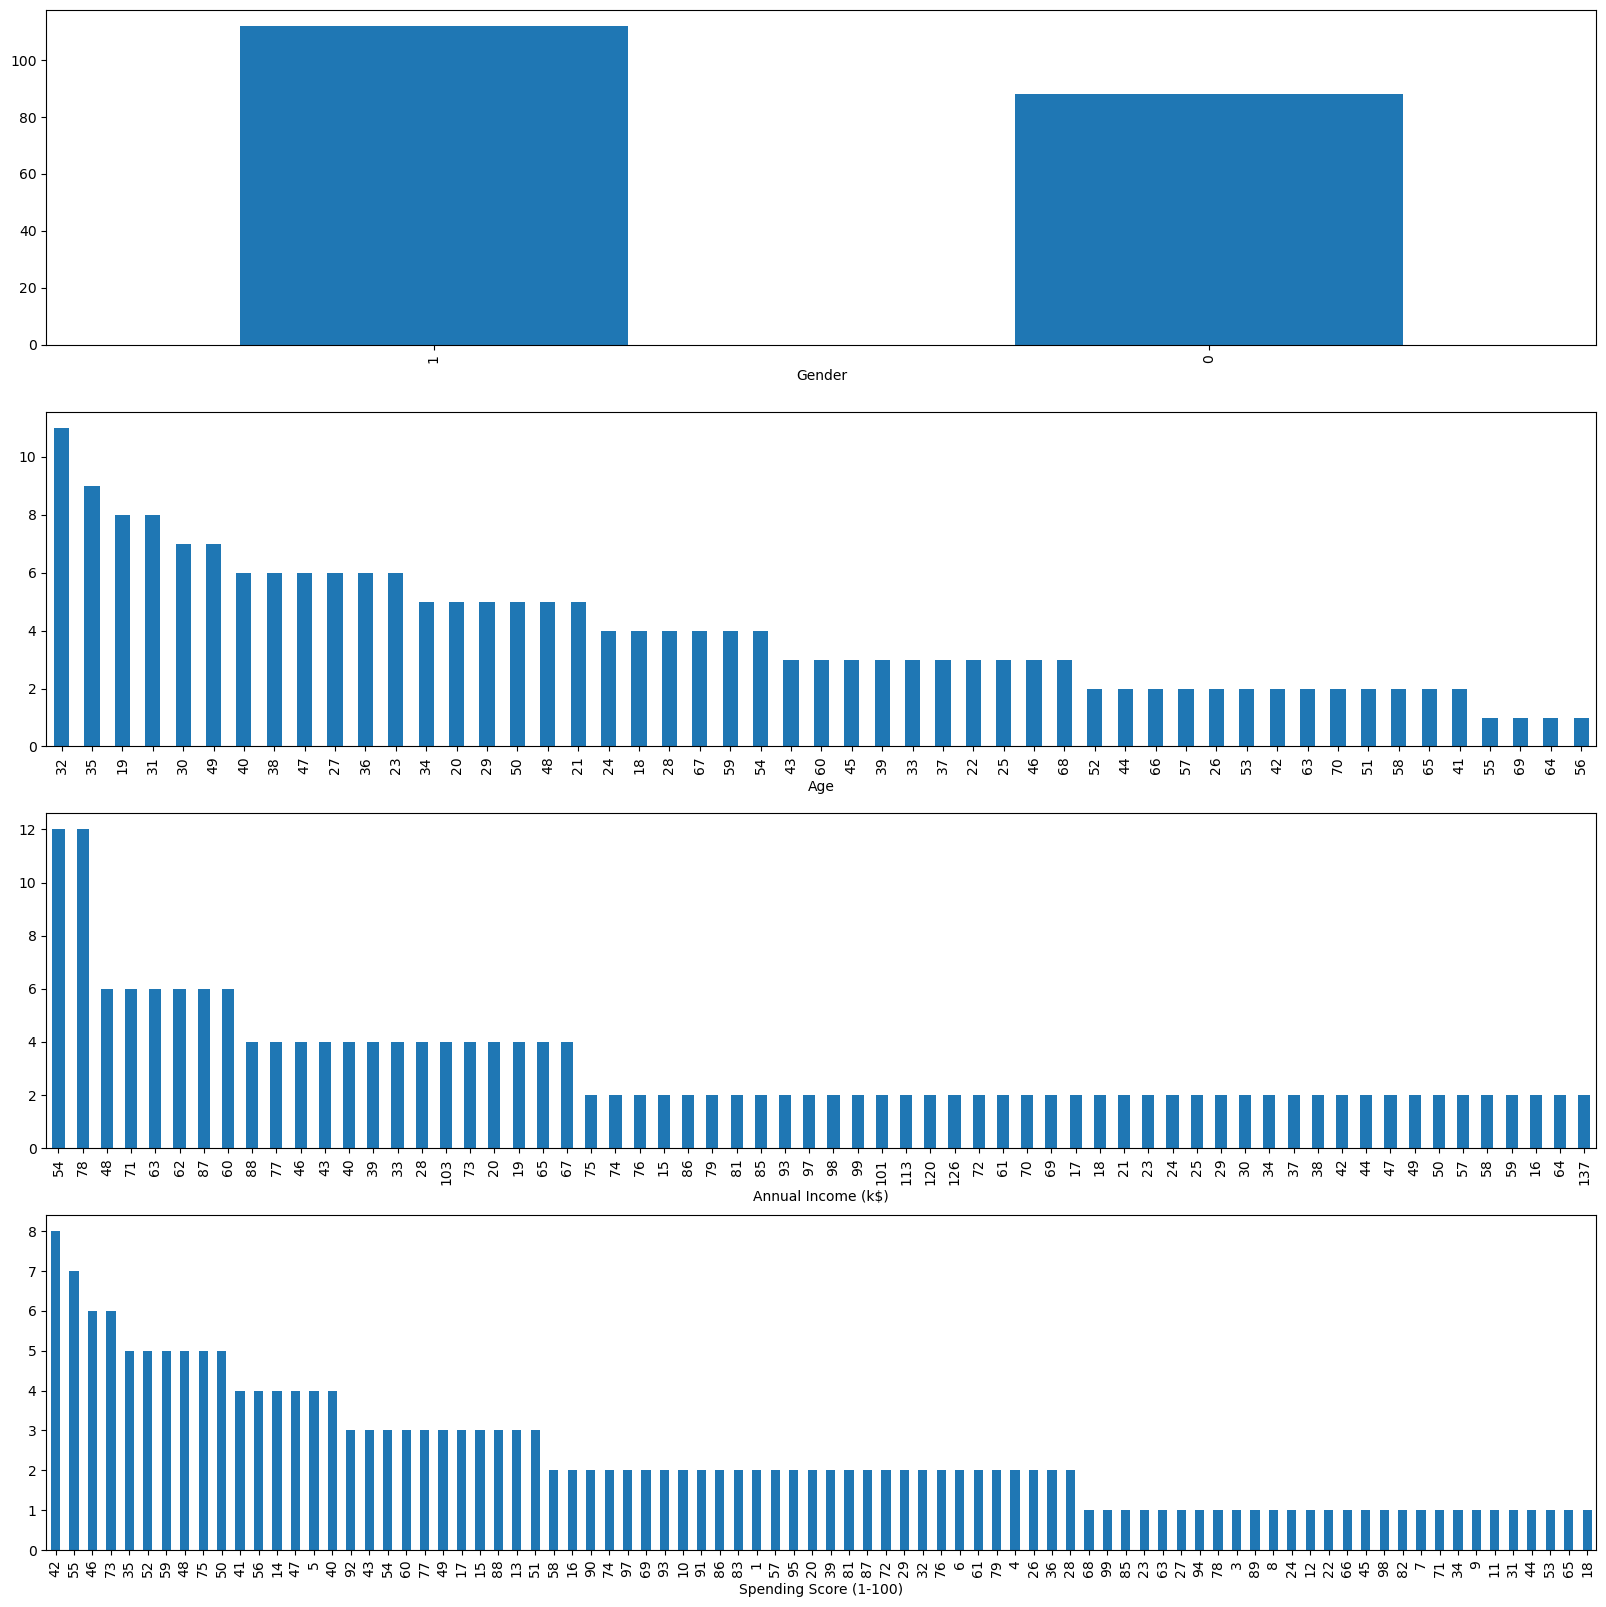

In [56]:
column=['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in range(0,4):
      plt.subplot(4, 1, i+1)
      df[column[i]].value_counts().plot.bar(figsize = (20, 20))

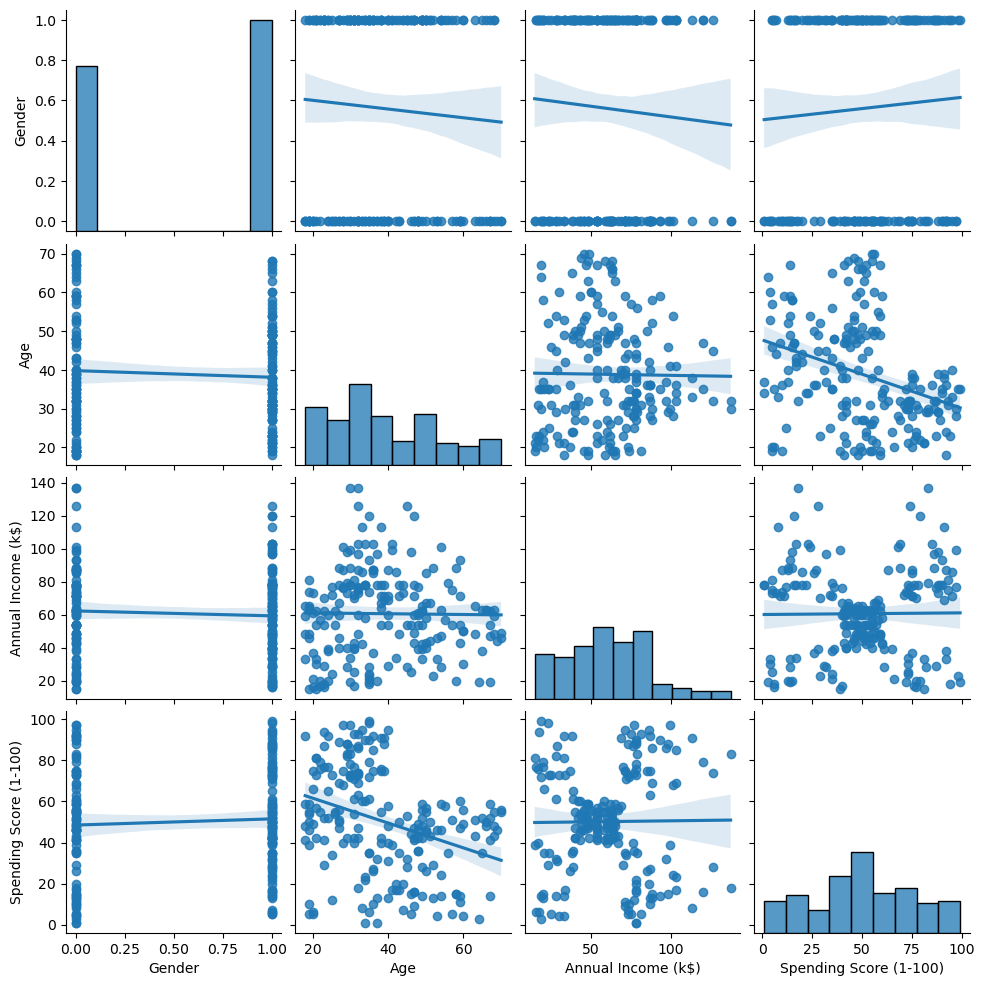

In [57]:
#Now, let's see tha pair plot
sns.pairplot(df, kind="reg")

<Axes: >

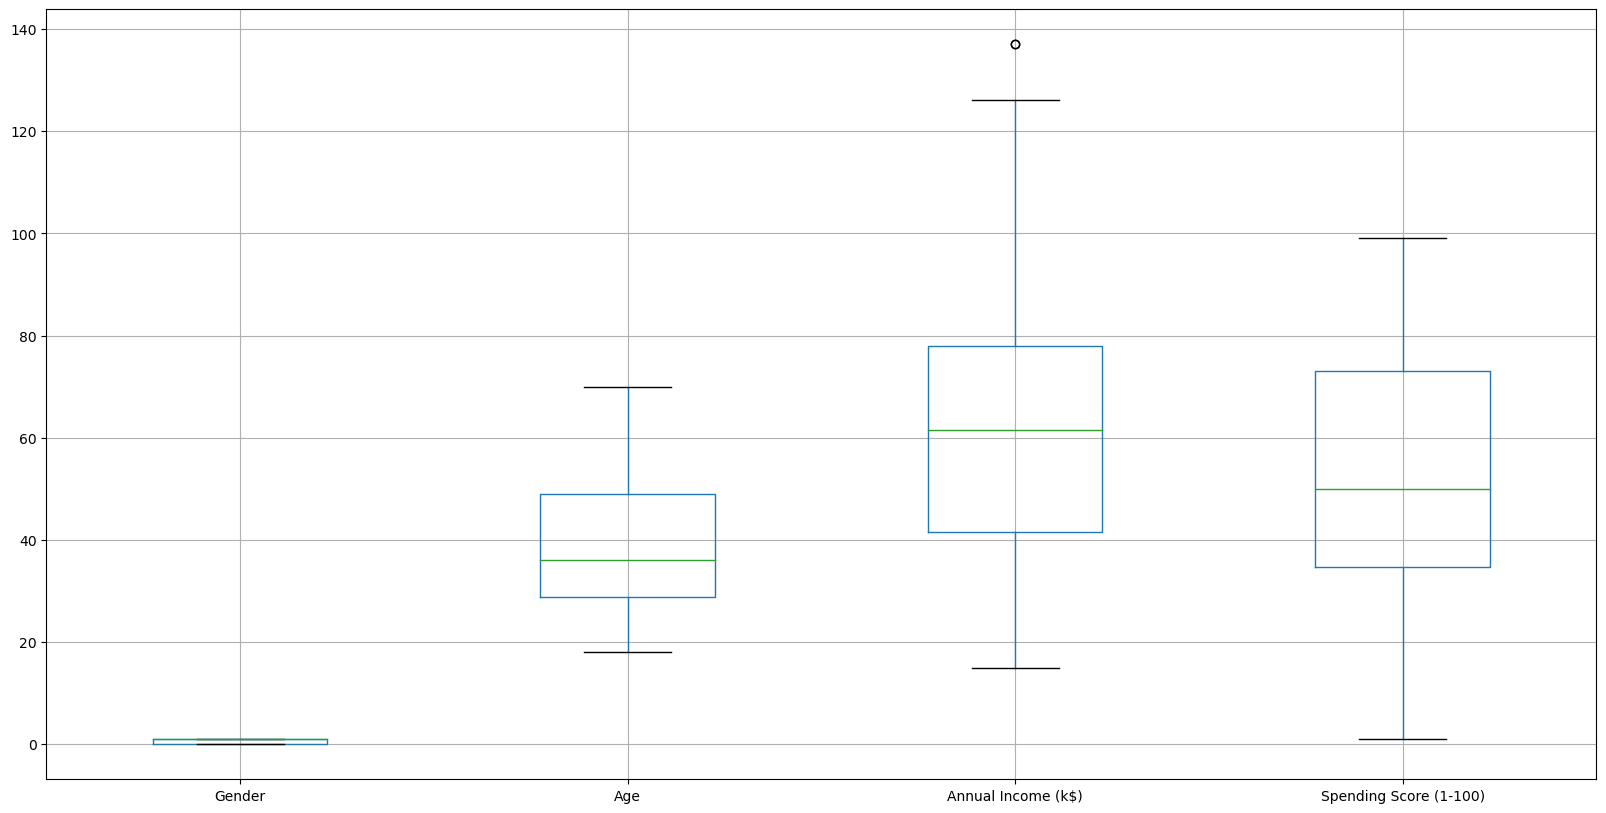

In [58]:
#Now, let's see the data with box plot, which is useful for outliers
plt.figure(figsize =(20,10))
df.boxplot()

# we can see that there is no outliers, only one strange one in annula income.

<Axes: >

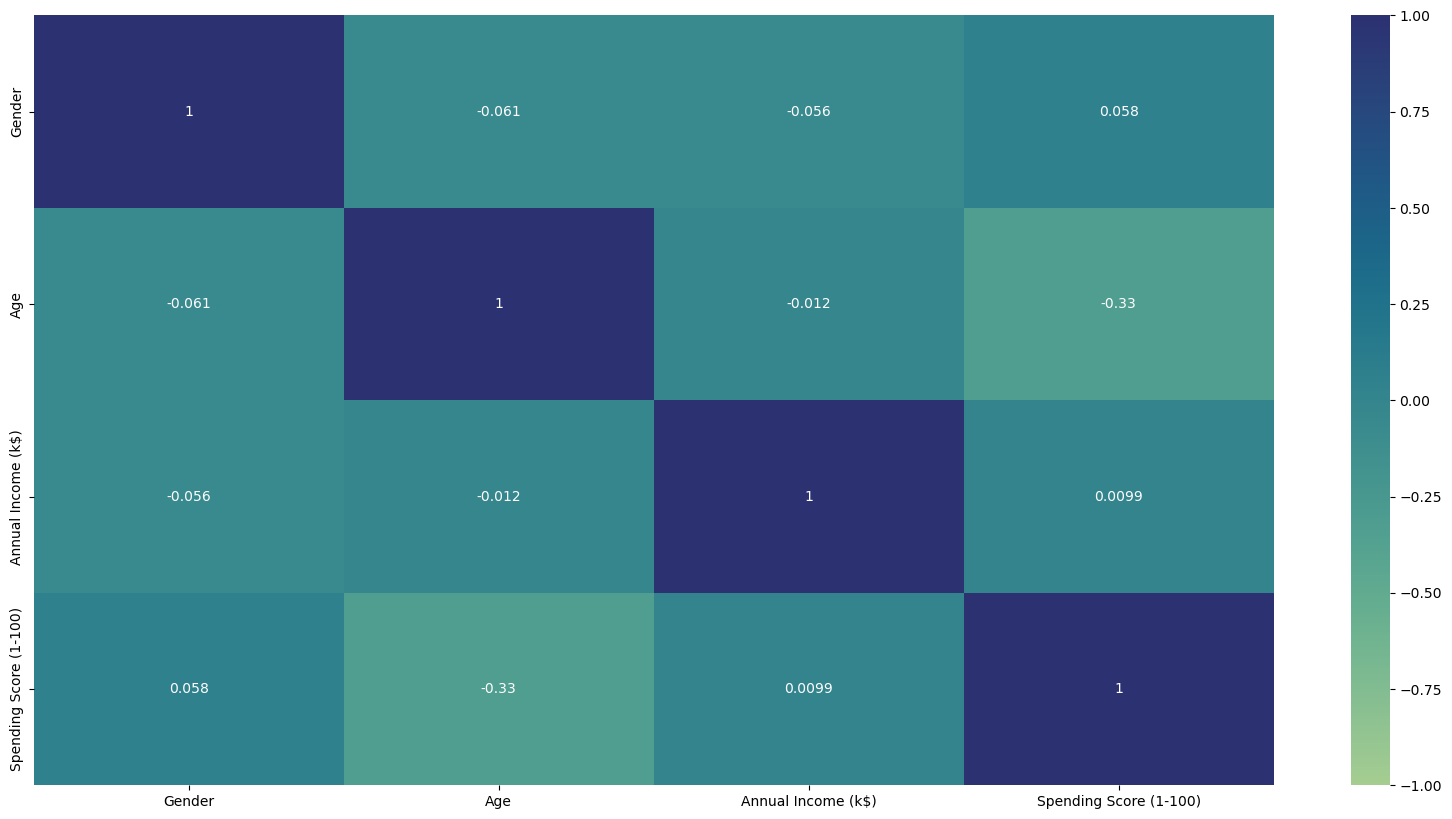

In [60]:
#Now, let's see if there is a multicolinuraty in our data, or correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, cmap="crest")
#As we can see, there is no correlation in our data.

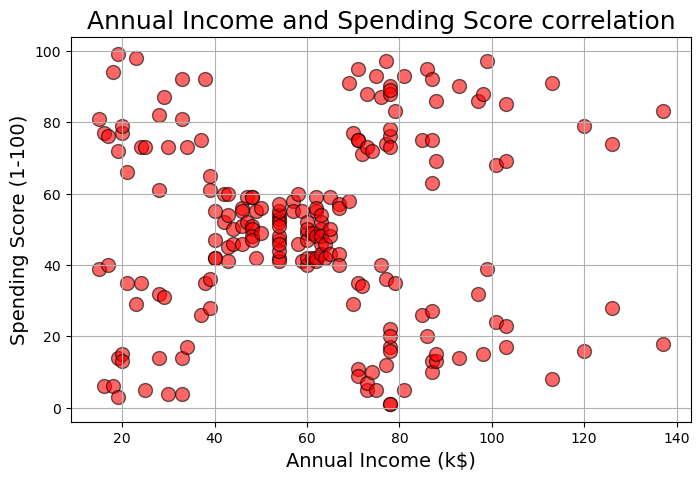

In [61]:
#Now let's see the relation with Annual Income and Spending Score correlation
plt.figure(figsize=(8,5))
plt.title("Annual Income and Spending Score correlation",fontsize=18)
plt.xlabel ("Annual Income (k$)",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='red',edgecolor='k',alpha=0.6, s=100)
plt.show()
#From that data, we can see that there are some people who earn not much and spent little, and others spent a lot
#In the middle, we can see that some of them who their income is in the middle spent in the middle as well
#the other part, who are more or a lot, some of them do not spend a lot, and some of them spend a lot.

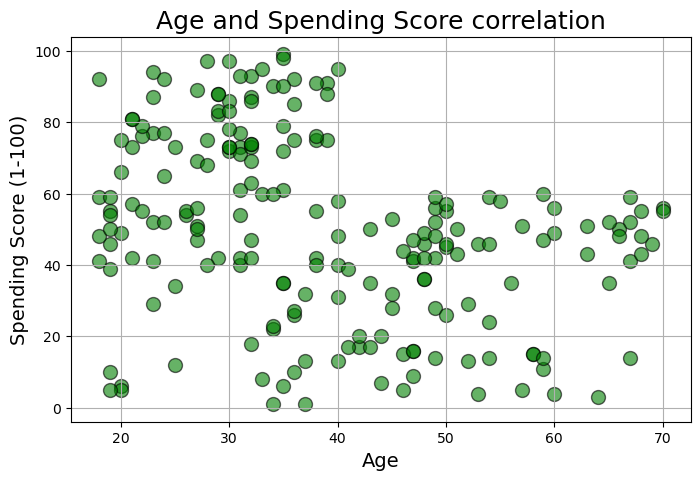

In [63]:
#Now, let's see the relation between Age and Spending Score correlation
plt.figure(figsize=(8,5))
plt.title("Age and Spending Score correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color='n',edgecolor='k',alpha=0.6, s=100)
plt.show()

#From the graph, we can see that the people between 20 to about 40 spent a lot compared to other ages.

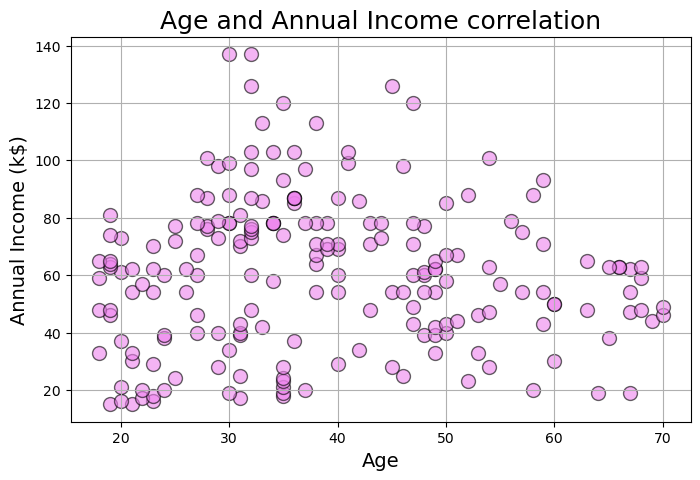

In [67]:
#Now, let's see the relation between Age and Annual Income correlation
plt.figure(figsize=(8,5))
plt.title("Age and Annual Income correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Annual Income (k$)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Annual Income (k$)'],color='violet',edgecolor='k',alpha=0.6, s=100)
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

#### *ii. Determine optimal number of clusters*

### Why silhouette_score is negative?

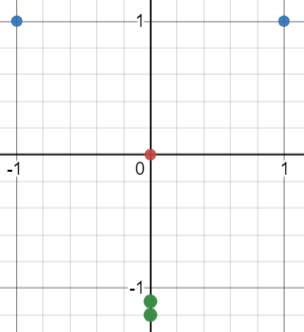

#### *iii. Apply K Means*

#### *iv. Visualizing and Labeling All the Clusters*

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

#### *ii. Determine optimal number of clusters*

#### *iii. Apply K Means*

#### *iv. Visualizing and Labeling All the Clusters*

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

## Clustering based on Annual Income and Spending Score- x2

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

#### Annual Income and Spending Score- x2

### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

#### Annual Income and Spending Score- x2

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___